In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# load data 
compressed_size_batches = pd.read_csv("./data/csv/661k_compressed_size.csv",header=None, sep = "\t", 
                                      names = ['size_Mb','name'], index_col = 'name')
compressed_size_batches.index = [i[2:-7] for i in compressed_size_batches.index]

distinct_31mers_batches = pd.read_csv("./data/csv/distinct_31mers_661k.csv", sep = ",")
distinct_31mers_batches.columns =["species","distinct_31mers"]
distinct_31mers_batches = distinct_31mers_batches.set_index("species")

In [3]:
compressed_size_batches.shape, compressed_size_batches.head()

((307, 1),
                                      size_Mb
 acinetobacter_baumannii__01              113
 acinetobacter_baumannii__02               42
 acinetobacter_nosocomialis__01            14
 acinetobacter_pittii__01                  23
 actinobacillus_pleuropneumoniae__01        6)

In [4]:
distinct_31mers_batches.shape, distinct_31mers_batches.head()

((305, 1),
                                      distinct_31mers
 species                                             
 acinetobacter_baumannii__01              159301616.0
 acinetobacter_baumannii__02               86562328.0
 acinetobacter_nosocomialis__01            43828308.0
 acinetobacter_pittii__01                  70363192.0
 actinobacillus_pleuropneumoniae__01       15841974.0)

In [5]:
merged_df = pd.merge(compressed_size_batches, distinct_31mers_batches, left_index=True, right_index=True)

In [6]:
merged_df.shape

(305, 2)

In [7]:
merged_df.head()

,size_Mb,distinct_31mers
acinetobacter_baumannii__01,113,159301616.0
acinetobacter_baumannii__02,42,86562328.0
acinetobacter_nosocomialis__01,14,43828308.0
acinetobacter_pittii__01,23,70363192.0
actinobacillus_pleuropneumoniae__01,6,15841974.0


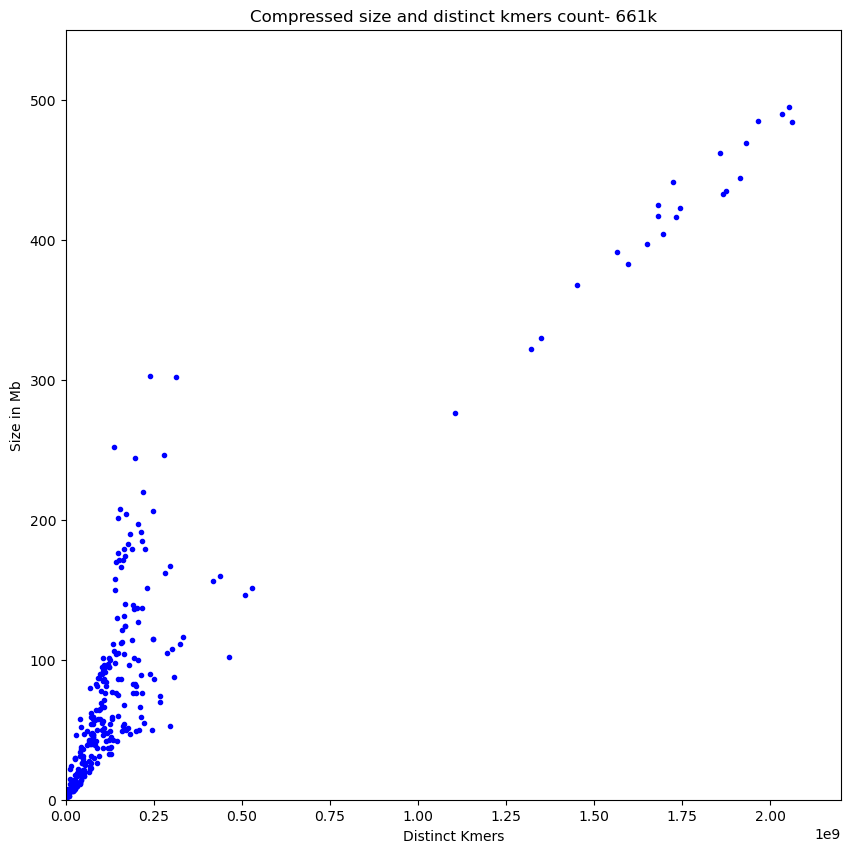

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
x = merged_df['distinct_31mers'].values
y = merged_df['size_Mb'].values

ax.set_ylabel('Size in Mb')
ax.set_xlabel('Distinct Kmers')
ax.set_title('Compressed size and distinct kmers count- 661k')
plt.xlim(0, 2200000000)
plt.ylim(0, 550)
ax.scatter(x, y, marker='.', color = 'blue')

In [9]:
simple_colors_9500 = {
    "Red": "#e6194B",
    "Green": "#3cb44b",
    "gold": "#ffe119",
    "Blue": "#4363d8",
    "darkgoldenrod": "#f58231",
    "Purple": "#911eb4",
    "Cyan": "#42d4f4",
    "Magenta": "#f032e6",
    "Lime": "#bfef45",
    "Pink": "#fabed4",
    "Teal": "#469990",
    "Lavender": "#dcbeff",
    "Brown": "#9A6324",
    "Beige": "#fffac8",
    "Maroon": "#800000",
    "Mint": "#aaffc3",
    "Olive": "#808000",
    "Apricot": "#ffd8b1",
    "Navy": "#000075",
    "Grey": "#a9a9a9",
    "Black": "#000000",
    "White": "#ffffff",
}

selected_colors = list(simple_colors_9500.keys())[:10]

In [10]:
species_name = [name[:-4] for name in merged_df.index]
merged_df['species'] = species_name

In [11]:
merged_df

,size_Mb,distinct_31mers,species
acinetobacter_baumannii__01,113,1.593016e+08,acinetobacter_baumannii
acinetobacter_baumannii__02,42,8.656233e+07,acinetobacter_baumannii
acinetobacter_nosocomialis__01,14,4.382831e+07,acinetobacter_nosocomialis
acinetobacter_pittii__01,23,7.036319e+07,acinetobacter_pittii
actinobacillus_pleuropneumoniae__01,6,1.584197e+07,actinobacillus_pleuropneumoniae
...,...,...,...
wolbachia_endosymbiont_of_drosophila_melanogaster__01,1,1.312887e+06,wolbachia_endosymbiont_of_drosophila_melanogaster
xanthomonas_oryzae__01,21,4.748350e+07,xanthomonas_oryzae
yersinia_enterocolitica__01,37,1.043645e+08,yersinia_enterocolitica
yersinia_pestis__01,8,8.080754e+06,yersinia_pestis


In [12]:
df_group_by_species = merged_df.groupby('species').sum()
df_group_by_species = df_group_by_species.sort_values(by = 'size_Mb',ascending = False)
colors = selected_colors[:10] + ['black']*(len(df_group_by_species)-10)
df_group_by_species['color'] = colors

In [13]:
df_group_by_species.head(15)

,size_Mb,distinct_31mers,color
species,,,
dustbin,9190,3.783392e+10,Red
salmonella_enterica,4816,6.541256e+09,Green
escherichia_coli,4404,4.062612e+09,gold
mycobacterium_tuberculosis,1190,3.229292e+09,Blue
klebsiella_pneumoniae,724,7.521528e+08,darkgoldenrod
streptococcus_pneumoniae,722,9.723605e+08,Purple
staphylococcus_aureus,633,1.283606e+09,Cyan
clostridioides_difficile,377,7.369809e+08,Magenta
pseudomonas_aeruginosa,343,4.613913e+08,Lime


In [14]:
colors_dict = dict(map(lambda i,j : (i,j) , df_group_by_species.index,colors))
merged_df['colors'] = merged_df['species'].map(colors_dict)
merged_df

,size_Mb,distinct_31mers,species,colors
acinetobacter_baumannii__01,113,1.593016e+08,acinetobacter_baumannii,black
acinetobacter_baumannii__02,42,8.656233e+07,acinetobacter_baumannii,black
acinetobacter_nosocomialis__01,14,4.382831e+07,acinetobacter_nosocomialis,black
acinetobacter_pittii__01,23,7.036319e+07,acinetobacter_pittii,black
actinobacillus_pleuropneumoniae__01,6,1.584197e+07,actinobacillus_pleuropneumoniae,black
...,...,...,...,...
wolbachia_endosymbiont_of_drosophila_melanogaster__01,1,1.312887e+06,wolbachia_endosymbiont_of_drosophila_melanogaster,black
xanthomonas_oryzae__01,21,4.748350e+07,xanthomonas_oryzae,black
yersinia_enterocolitica__01,37,1.043645e+08,yersinia_enterocolitica,black
yersinia_pestis__01,8,8.080754e+06,yersinia_pestis,black


In [15]:
[color.lower() for color in merged_df.loc[:,'colors'].values]
list(df_group_by_species.index.values[:10]) + ['other']

['dustbin',
 'salmonella_enterica',
 'escherichia_coli',
 'mycobacterium_tuberculosis',
 'klebsiella_pneumoniae',
 'streptococcus_pneumoniae',
 'staphylococcus_aureus',
 'clostridioides_difficile',
 'pseudomonas_aeruginosa',
 'listeria_monocytogenes',
 'other']

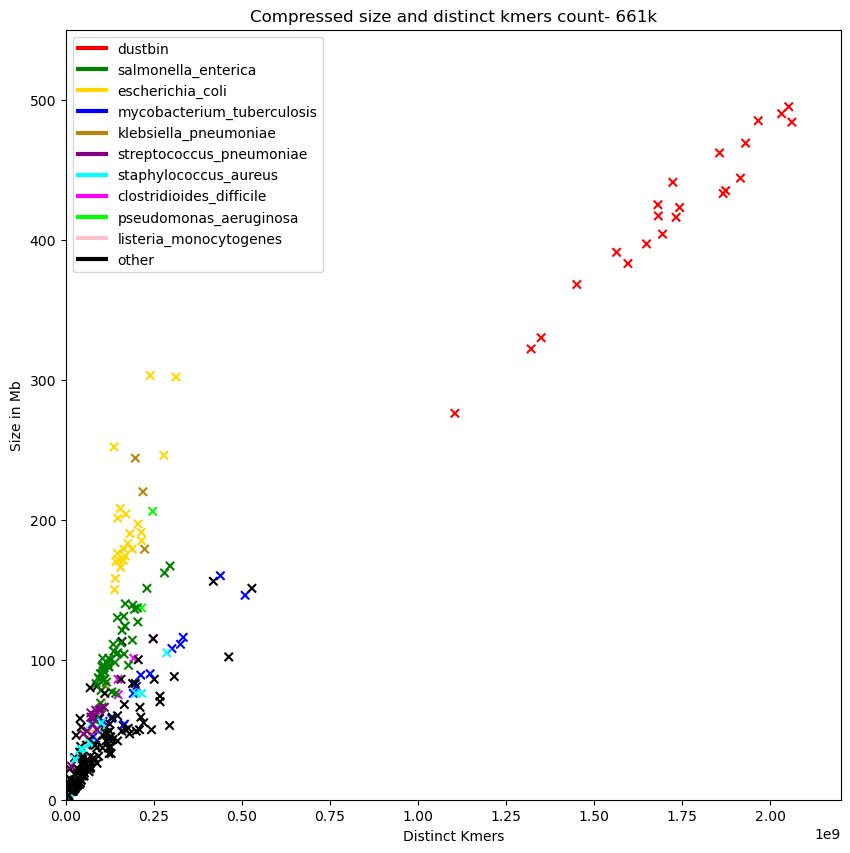

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
x = merged_df['distinct_31mers'].values
y = merged_df['size_Mb'].values

ax.set_ylabel('Size in Mb')
ax.set_xlabel('Distinct Kmers')
ax.set_title('Compressed size and distinct kmers count- 661k')
plt.xlim(0, 2200000000)
plt.ylim(0, 550)
ax.scatter(x, y, marker='x', color = merged_df['colors'].values)

species_colors = colors
labels = list(df_group_by_species.index.values[:10]) + ['other']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in species_colors]
ax.legend(lines,labels)

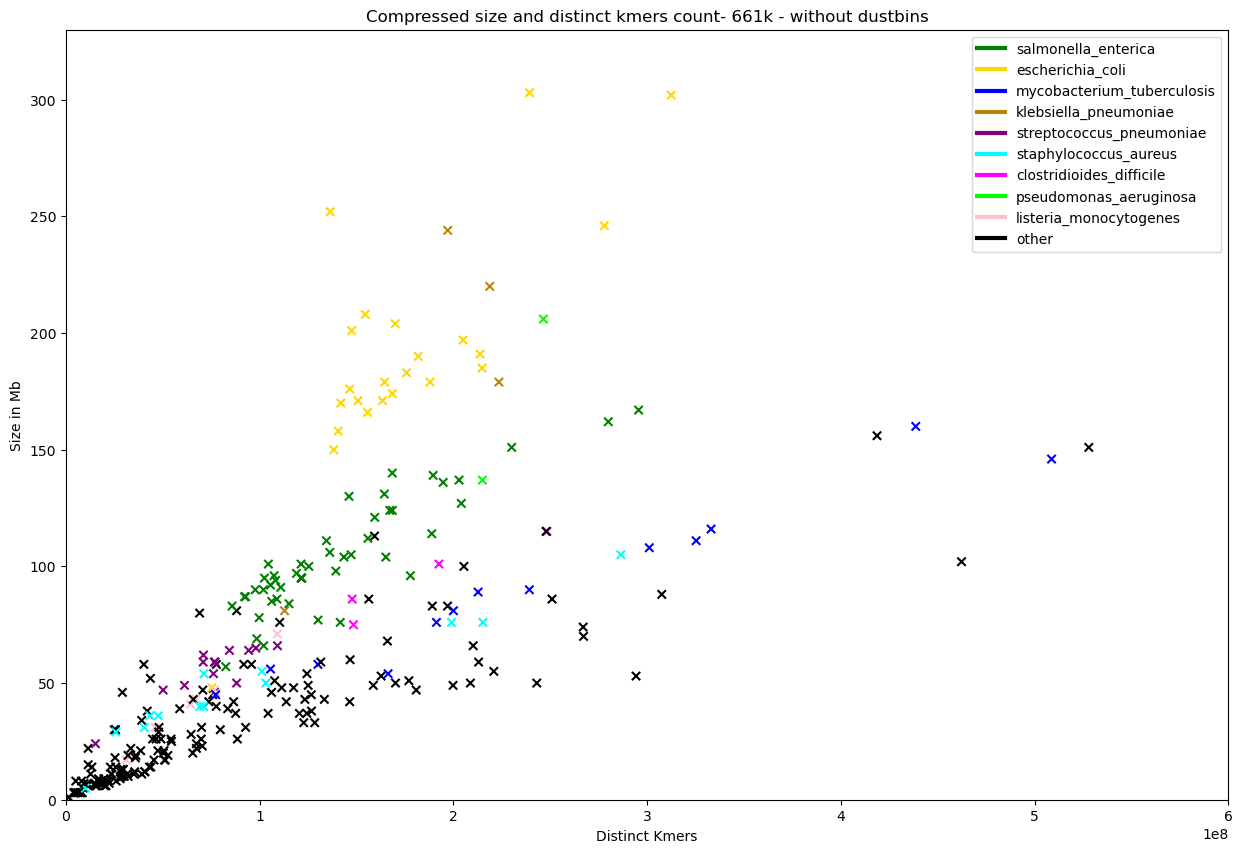

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))
x = merged_df['distinct_31mers'].values
y = merged_df['size_Mb'].values

ax.set_ylabel('Size in Mb')
ax.set_xlabel('Distinct Kmers')
ax.set_title('Compressed size and distinct kmers count- 661k - without dustbins')
plt.xlim(0, 600000000)
plt.ylim(0, 330)
ax.scatter(x, y, marker='x', color = merged_df['colors'].values)

species_colors = colors
labels = list(df_group_by_species.index.values[1:10]) + ['other']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in species_colors[1:]]
ax.legend(lines,labels)

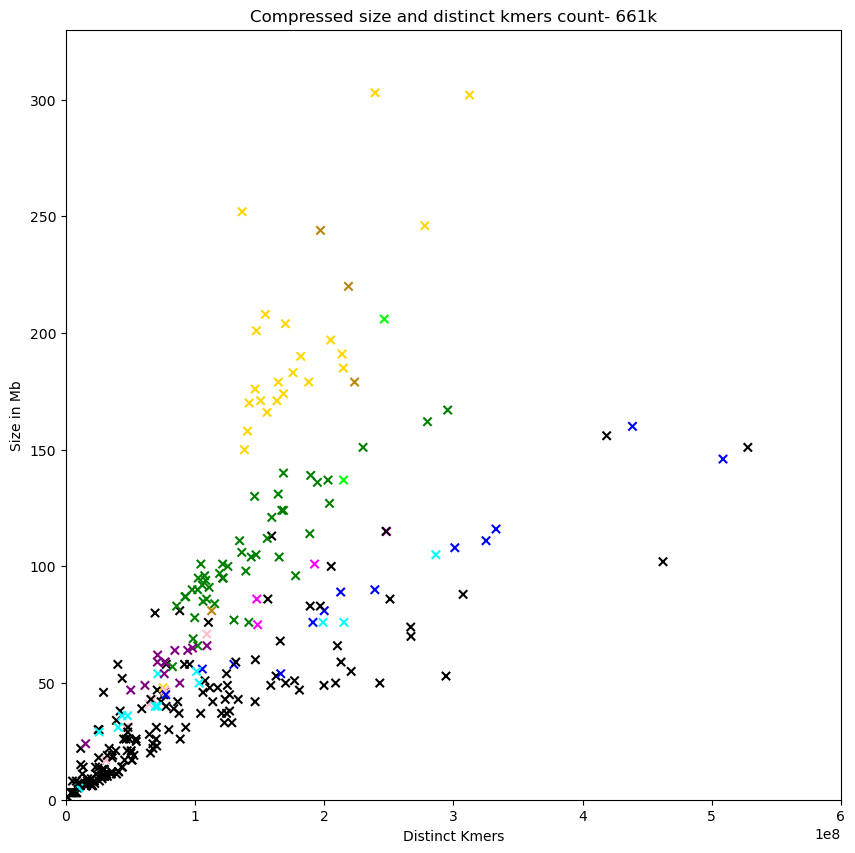

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
x = merged_df['distinct_31mers'].values
y = merged_df['size_Mb'].values

ax.set_ylabel('Size in Mb')
ax.set_xlabel('Distinct Kmers')
ax.set_title('Compressed size and distinct kmers count- 661k')
plt.xlim(0, 600000000)
plt.ylim(0, 330)
ax.scatter(x, y, marker='x', color = merged_df['colors'].values)